## Subscription  App Behavior Analysis
### A Fintech Case Study

In today's market many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, are ***YouTube Red, Pandora Premium, Audible Subscription, YouTube Premium***, and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

- **Market:** The target audience is customers who use a company's free products. In this case study, this refers to users who installed (and used) the companies free mobile app.

- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, ***`Youtube Red allows you to leave the app while still listening to a video.`***

- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to ***`convert`*** them to paid users.

---

###  Business Challenge
- In this Case Study we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked.

- The company has tasked you to identify which users will mostly likely NOT enroll in paid products, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.


### DATA
- We have access to each customer's app behavior data. This data allows us to see the date & time of app installation, as well as the features the users engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.
- The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trail is over.

- The Data for this project is from manufacturing fields based on trends found in real world case studies. The fields  describe what companies usually track from their users.

**Data Description**
- **User** : this is Unique id of each perticuter user of app
- **first_open** : this is the date/month/year, time the user frist time open the app
- **dayofweek** : this shows the day out of 7 days a week an user join the app where 0:Sunday & 6:Saturday
- **hour** : This is outoff 24 hour of day the user 1st open the app
- **age** : This is simply the age of the user
- **screen_list** : This describe the every single screen name the user visited in that 1st 24-hour (screen name seperated by comma)
- **numscreens** : The Number of screen the user visited in 1st 24 hour
- **minigame** : The app has minigame feature, this shows whether the user played any minigame or not (1:Played, 0: Not Played)
- **liked** : There are like button for each feature in the app, shows whether the user cliked any like button of any feature in app or NOT (1: click like button, 0: Not clicked)
- **used_premium_feature** : This shows whether the user used any premium feature (that is for free in 1st 24 hour) or not in 1st 24 hour (1: used, 0: not used)
- **enrolled** : This is target that shows whether the user enrolled to premium after the free trial (1: enrolled, 0: not enrolled)
- **enrolled_date** : date & time of enrollment to premium product if they enrolled to premium

---


## Libraries & Data-sets

####  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from dateutil import parser
import datetime
from IPython.display import display, HTML

Libraries:
- Numpy for numeric calculation
- Pandas for Data analysis and Manipulation
- Matplotlib( pyplot ) for Data visualization
- Seaborn for Data visualization 
- dateutil for converting time in date time datatype 
- datetime is used for date and time manipulation 

#### Importing Dataset for Project

In [2]:
dataset = pd.read_csv("appData.csv") # dataset
dataset.describe() # Distribution of Numerical values

,user,dayofweek,age,numscreens,minigame,liked,used_premium_feature,enrolled
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.165000,0.172020,0.621480
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.371184,0.377402,0.485023
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


- Here we can see that average age of user is around 32
- On an average, user visits 21 screens, also 10% of user plays minigame, 16% of users liked features of app, 17% of user used premium features of app & 62% enrolled to premium

In [3]:
dataset.shape # shows no.of variables

(50000, 12)

we have 50000 users on the basis of 11 independent & one target variable

# Exploratory Data Analysis (EDA)

In [4]:
dataset.head(10) # Viewing first 10 rows DataFrame

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,02-12-2012 01:16,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,19-03-2013 19:19,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN
3,234192,05-07-2013 16:08,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,05-07-2013 16:11
4,51549,26-02-2013 18:50,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,26-02-2013 18:56
5,56480,03-04-2013 09:58,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,0,1,03-04-2013 09:59
6,144649,25-12-2012 02:33,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,0,NaN
7,249366,11-12-2012 03:07,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,0,1,0,NaN
8,372004,20-03-2013 14:22,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,0,1,1,27-04-2013 22:24
9,338013,26-04-2013 18:22,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,0,1,26-04-2013 18:31


In [5]:
dataset.tail(10) # Viewing last 10 rows DataFrame

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
49990,179308,25-05-2013 17:30,5,17:00:00,20,"Splash,idscreen,Cycle,Home,product_review,prod...",8,0,1,0,1,26-05-2013 06:33
49991,85532,01-02-2013 22:34,4,22:00:00,45,"Splash,Cycle,Home,Loan2,Loan1,MLWebView,Instit...",30,1,0,1,1,01-02-2013 22:35
49992,96155,03-02-2013 15:41,6,15:00:00,50,"idscreen,joinscreen,product_review,product_rev...",28,0,0,0,1,03-02-2013 15:43
49993,343026,24-11-2012 02:02,5,02:00:00,28,"joinscreen,product_review,product_review2,Scan...",4,0,1,0,0,NaN
49994,90813,25-02-2013 19:35,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,0,1,25-02-2013 19:36
49995,222774,09-05-2013 13:46,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,0,1,09-05-2013 13:47
49996,169179,09-04-2013 00:05,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,0,1,0,NaN
49997,302367,20-02-2013 22:41,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,NaN
49998,324905,28-04-2013 12:33,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,0,1,28-04-2013 12:35
49999,27047,14-12-2012 01:22,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,1,0,0,NaN


#### Clean view of all the screen names 

In [6]:
for i in [1,2,3,4,5]:
    print(dataset.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [7]:
dataset.isnull().sum() # take summation of null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
liked                       0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
dtype: int64

---
** After running the below cell, I made a conclusion that user has a 24hour free trail of Premium version of app and this is how company collects data **

#### Get the unique value of each columns and it's length 

In [8]:
features = dataset.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, dataset[i].unique(), len(dataset[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['27-12-2012 02:14' '02-12-2012 01:16' '19-03-2013 19:19' ...
 '09-04-2013 00:05' '20-02-2013 22:41' '28-04-2013 12:33']
len is 45335 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75

### Changing data types to usable integer data type

In [9]:
dataset.dtypes # Checking all the data types in DataFrame

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
liked                    int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
dtype: object

In [10]:
dataset.info() # breif information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
liked                   50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [11]:
#  hour data convert string to int

dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [12]:
# Checking all the data types in DataFrame

dataset.dtypes  

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
liked                    int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
dtype: object

In [13]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open'])


In [14]:
dataset2

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,1,0
3,4,16,28,40,0,0,0,1
4,1,18,31,32,0,1,0,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0,1
49996,1,0,35,4,0,0,1,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,0,1


##### EDA on categorical Data with countplots

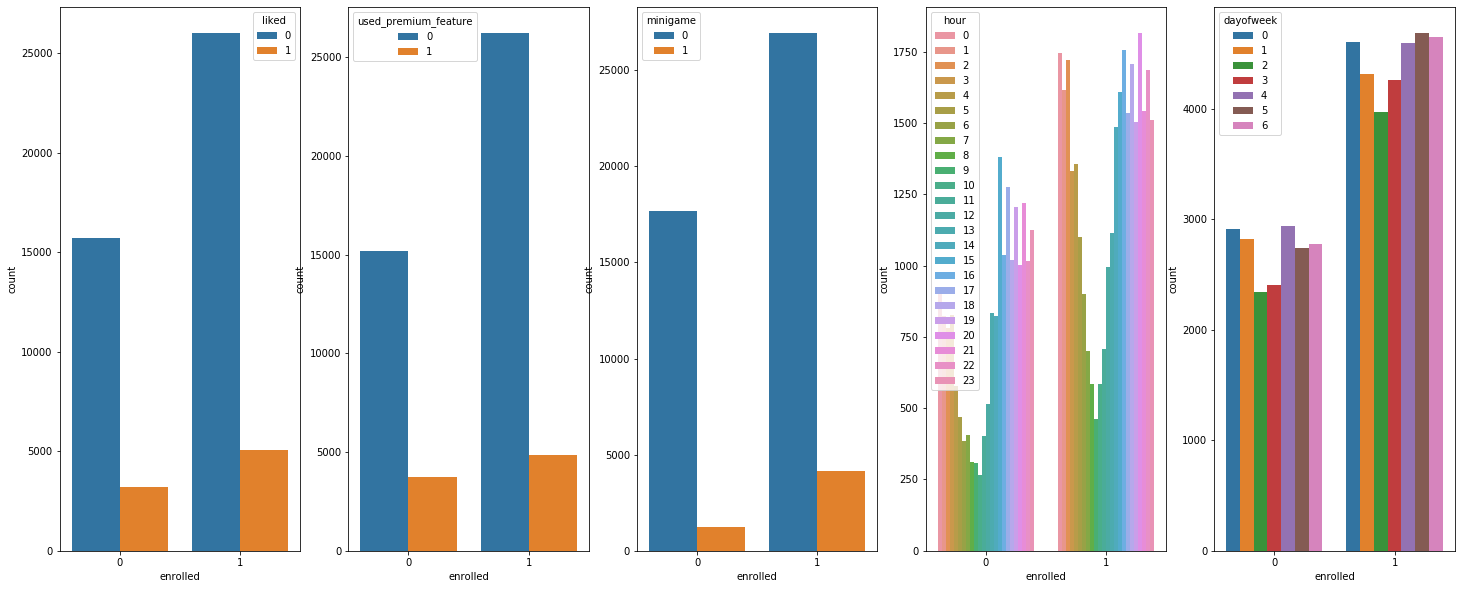

In [15]:
fig, ax =plt.subplots(1, 5, figsize=(25,10))
sns.countplot(x = 'enrolled', hue = 'liked', data = dataset2, ax = ax[0])
sns.countplot(x = 'enrolled', hue = 'used_premium_feature', data = dataset2, ax = ax[1])
sns.countplot(x = 'enrolled', hue = 'minigame', data = dataset2, ax = ax[2])
sns.countplot(x = 'enrolled', hue = 'hour', data = dataset2, ax = ax[3])
sns.countplot(x = 'enrolled', hue = 'dayofweek', data = dataset2, ax = ax[4])
plt.savefig('all features vs enrolled')

#### Plot Histogram for all features


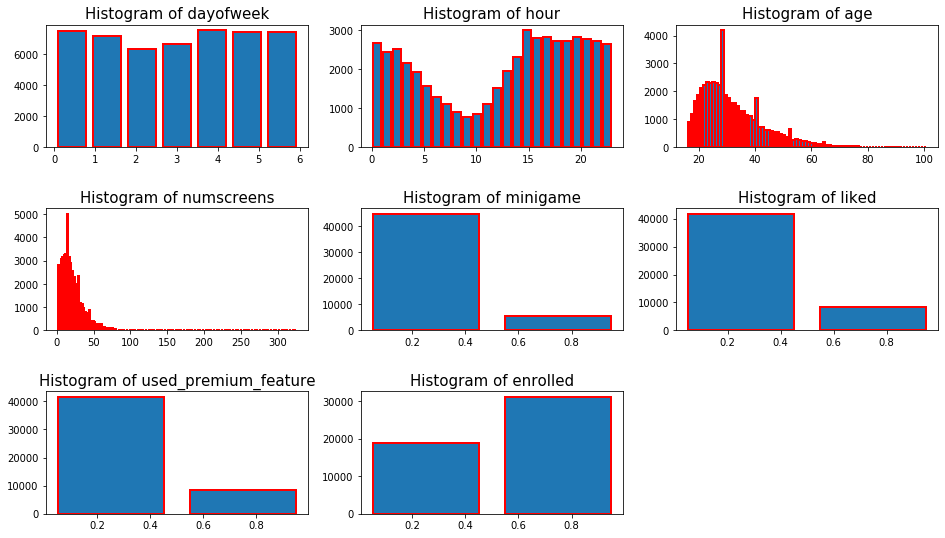

In [16]:

plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = dataset2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(dataset2[j].unique()) # bins for histogram
    plt.hist(dataset2[j], bins = bins, rwidth = 0.8, edgecolor = "r", linewidth = 2, ) # plot histogram
    
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots) *****code 8
plt.savefig('app_data_hist.jpg')

Observations:
- Most of the users join app during weekends
- Most of the users 1st open the app around 15 that is around 3PM
- Most of users are aged around 30 Years
- Most of users visited around 20 screens of app
- Not many users played any minigames
- Not many users press the like button
- Not many user used premium feature in 1st 24 hours


#### Correlation barplot with 'enrolled' feature

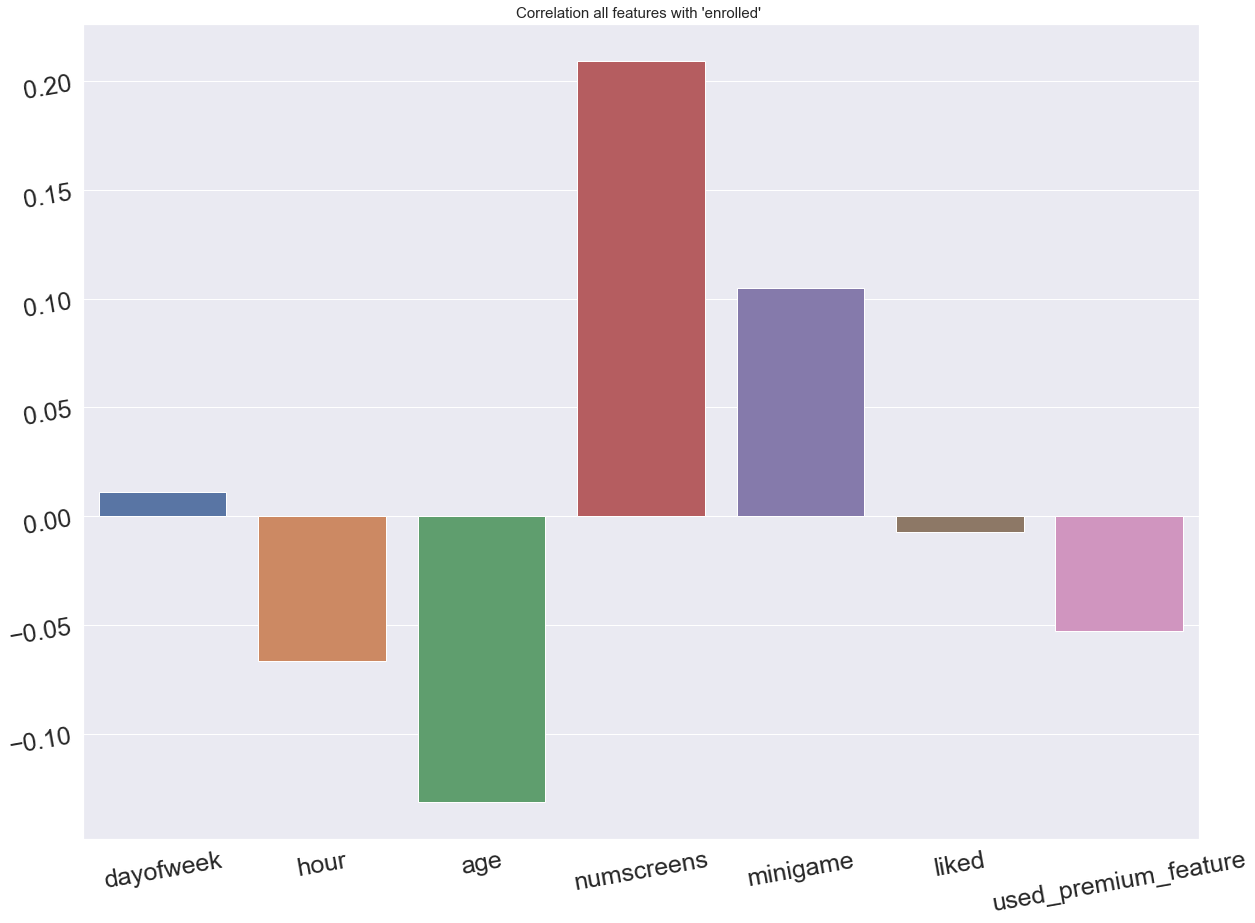

In [17]:
sns.set() # set background dark grid
plt.figure(figsize = (20,15)) # setting size to 20,15 
plt.title("Correlation all features with 'enrolled' ", fontsize = 15) # title of plot
dataset3 = dataset2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(dataset3.columns,dataset3.corrwith(dataset2.enrolled)) # plot barplot 
ax.tick_params(labelsize=25, labelrotation = 10, color ="k") 
plt.savefig('Corrrelation all features with enrolled') # saving barplot

Observarions:
- dayofweek is least positively correlated & says that if you join the app in day 0(sunday) then their is most likely to get enrolled to the premium features
- Hour is negatively correlated with target variable shows the earlier the hour(in night) the most likely to get enrolled
- age is also negatively correlated reflects that the younger users are most likely to get enrolled
- Numscreen is positively correlated with target shows that more the no. of screen user visits more chances of getting enrolled
- minigame also shows that more the minigame user play more chances of getting enrolled
- liked is very least negative which does not have much impact in target
- interestingly used_premium_feature is negatively correlated with response meaning that if user used the premium feature in 1st 24 hour that he/she might not enroll after the trial version of premium features

#### Heatmap using correlation matrix

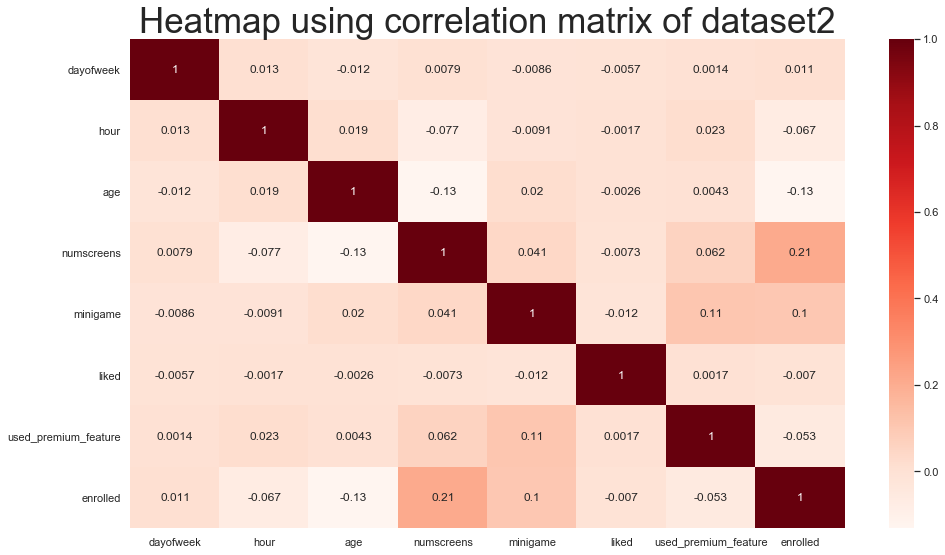

In [18]:
plt.figure(figsize=(16,9)) # heatmap size is ratio 16:9
sns.heatmap(dataset2.corr(), annot = True, cmap ='Reds') # show heatmap
plt.title("Heatmap using correlation matrix of dataset2", fontsize = 35) # title of heatmap
plt.savefig('Heatmap using correlation matrix of dataset2.jpg') # saving heatmap

All the independent features are having very less correlation among themselves, so their is very less chance of multicollinearity problem

---

## Pairplot of Dataset2

### Pairplot of dataset2 for graph in seperate window

C:\Users\ADITYA MANTRIPRAGADA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ADITYA MANTRIPRAGADA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ADITYA MANTRIPRAGADA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ADITYA MANTRIPRAGADA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


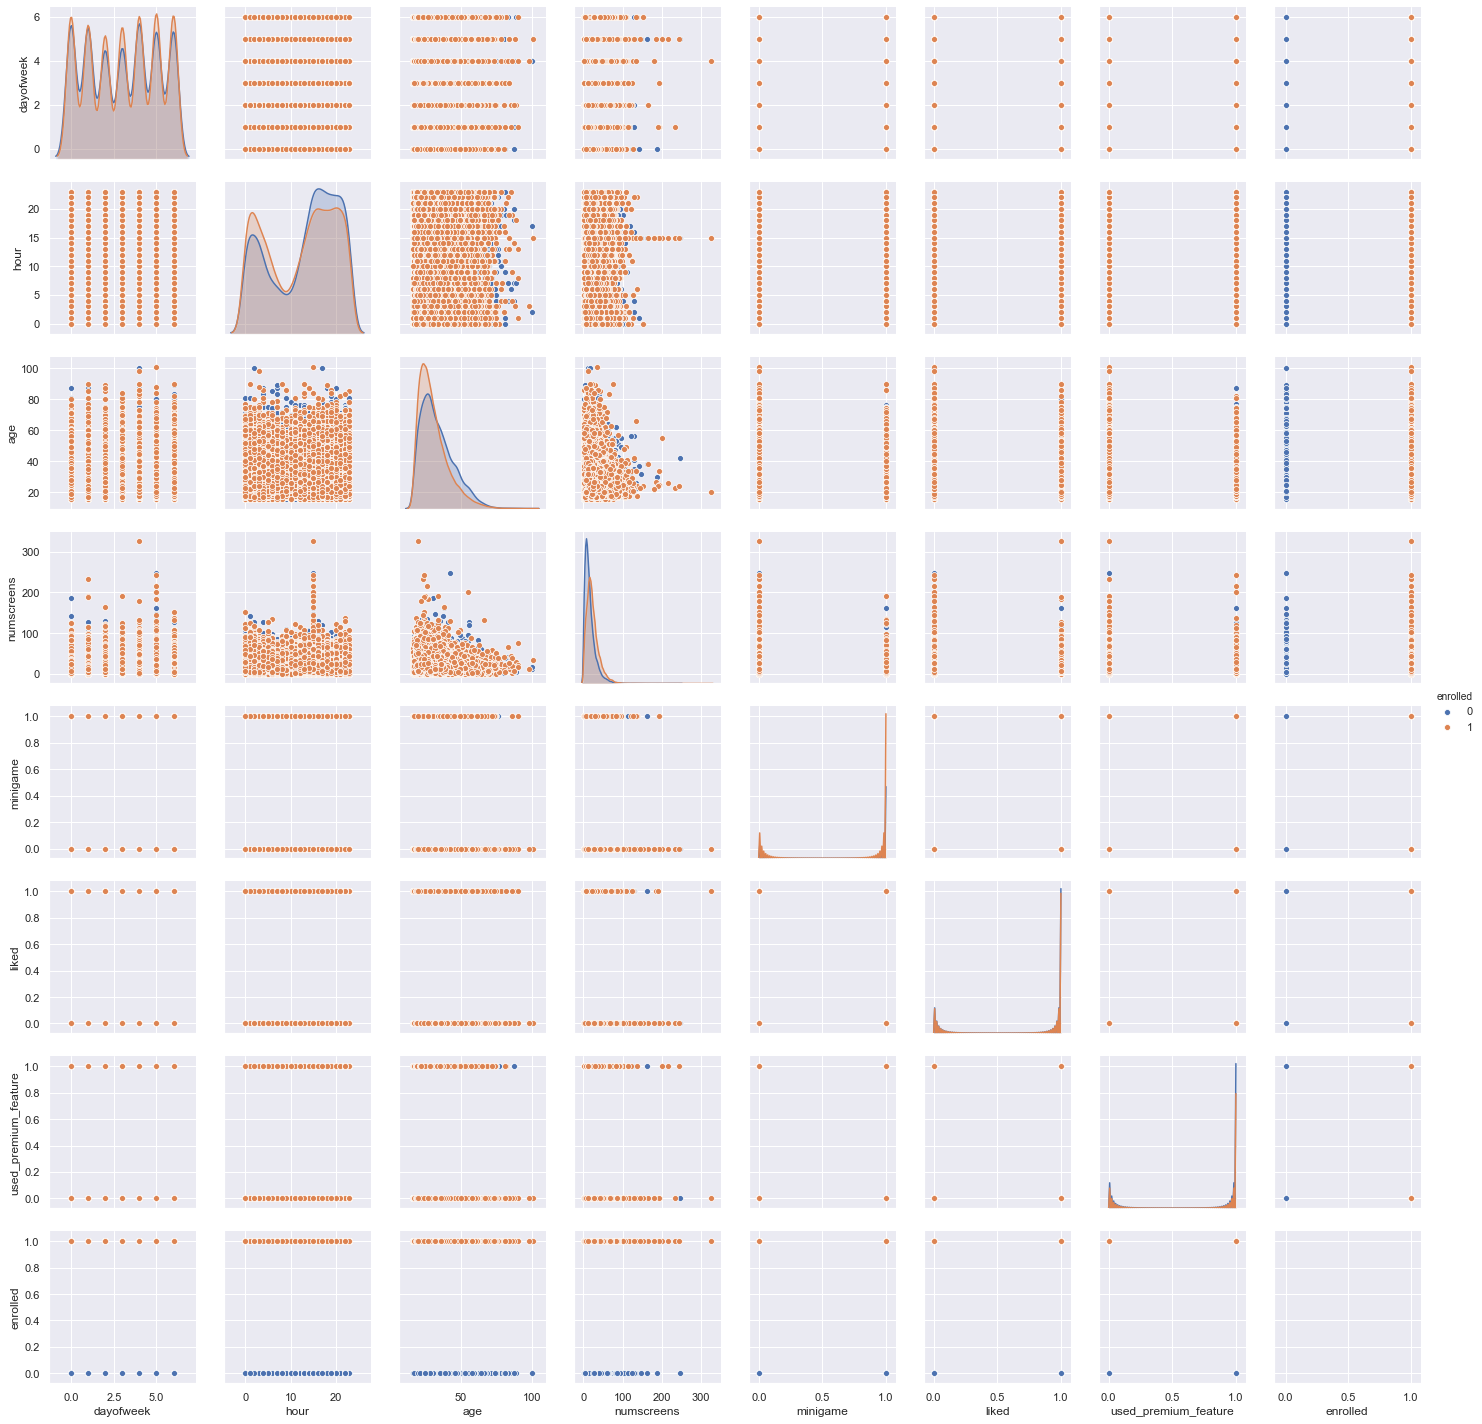

In [19]:
sns.pairplot(dataset2, hue  = 'enrolled') #  show pairplot 
plt.savefig('Enrolled pairplot') # saving pairplot

Observarions:
- dayofweek is least positively correlated & says that if you join the app in day 0(sunday) then their is most likely to get enrolled to the premium features
- Hour is negatively correlated with target variable shows the earlier the hour(in night) the most likely to get enrolled
- age is also negatively correlated reflects that the younger users are most likely to get enrolled
- Numscreen is positively correlated with target shows that more the no. of screen user visits more chances of getting enrolled
- minigame also shows that more the minigame user play more chances of getting enrolled
- liked is very least negative which does not have much impact in target
- interestingly used_premium_feature is negatively correlated with response meaning that if user used the premium feature in 1st 24 hour that he/she might not enroll after the trial version of premium features

### Countplot of enrolled

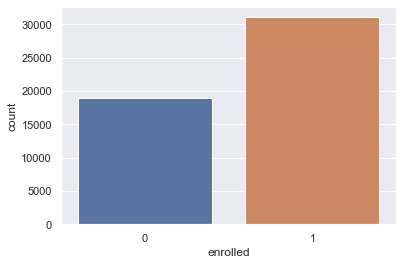

In [20]:
sns.countplot(dataset.enrolled) # showing enrolled plot

In [21]:
print("Not enrolled user = ", (dataset.enrolled < 1).sum(), "out of 50000") # non enrolled users
print("Enrolled user = ",50000-(dataset.enrolled < 1).sum(),  "out of 50000") # enrolled users

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


## Feature Engineering

In [22]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
liked                    int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
dtype: object

In [23]:
# parsing object data into data time format
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]                                      

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
liked                   50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


#### Selecting Time for response

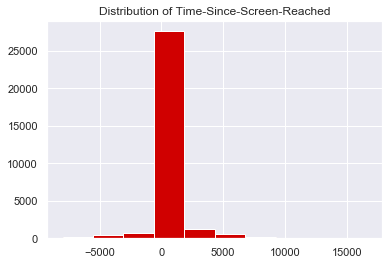

In [25]:
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#D00000')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

Here we observe that most of users enrolled in 1st 2000 Hour but their might be case that most enrollment is in 1st 100 or 500 hours, lets zoom the plot

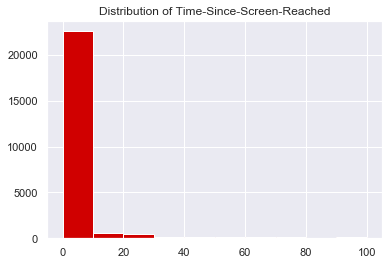

In [26]:
plt.hist(dataset["difference"].dropna(), color='#D00000', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

***Here we conclude that most of users (more that 20000 out-off total 50000 users) do not used the 1st 24 hour premium free trial & infact they direcly jumped to the premium at the time of they 1st open the app***

I chose cut-off as 48 hours that is whoever difference is less than 48 is classified as enrolled else not

In [27]:
dataset

,user,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,0,1
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,0,1,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,0,1


###  Formatting the screen_list field 

By formatting screen_list and loaded it into a seperate dataset namely top_screens.csv

In [28]:
# read csv file and convert it into numpy array
scrdataset = pd.read_csv("top_screens.csv").top_screens.values

In [29]:
scrdataset # screens dataset

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [30]:
type(scrdataset)

numpy.ndarray

In [31]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [32]:
# string into to number

for screen_name in scrdataset:
    dataset[screen_name] = dataset.screen_list.str.contains(screen_name).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(screen_name+",", "")

In [33]:
dataset.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [34]:
dataset.screen_list.str.replace('Splash'+",", "")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [35]:
dataset.shape

(50000, 68)

In [36]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dataset.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [38]:
dataset.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [39]:
dataset['remain_screen_list'] = dataset.screen_list.str.count(",")

In [40]:
dataset.drop(columns = ['screen_list'], inplace=True)

In [41]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13


In [42]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

**`Funnels : Funnels are group of screens that belong to same set There are many screens that are correlated with eachother, and
we don''t want correlated screens coz it's not good idea for the model`**

In [43]:
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ] # funnels
dataset['saving_screens_count'] = dataset[saving_screens].sum(axis = 1)
dataset.drop(columns = saving_screens, inplace = True)

In [44]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ] # funnels
dataset['credit_screens_count'] = dataset[credit_screens].sum(axis = 1)
dataset.drop(columns = credit_screens, axis = 1, inplace = True)

In [45]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ] # funnels
dataset['cc_screens_count'] = dataset[cc_screens].sum(axis = 1)
dataset.drop(columns = cc_screens, inplace = True)

In [46]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ] # funnels
dataset['loan_screens_count'] = dataset[loan_screens].sum(axis = 1)
dataset.drop(columns = loan_screens, inplace = True)
dataset

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,1,0,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,1,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,1,1,...,0,0,0,0,0,13,0,0,0,0


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int32
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
liked                      50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
location                   50000 non-null int32
Institutions               50000 non-null int32
VerifyPhone                50000 non-null int32
BankVerification           50000 non-null int32
VerifyDateOfBirth          50000 non-null int32
ProfilePage                50000 non-null int32
VerifyCountry              50000 non-null int32
Cycle                      50000 non-null int32
idscreen                   50000 non-null int32
Splash                     

### Heatmap with correlation matrix of new and funneled dataset

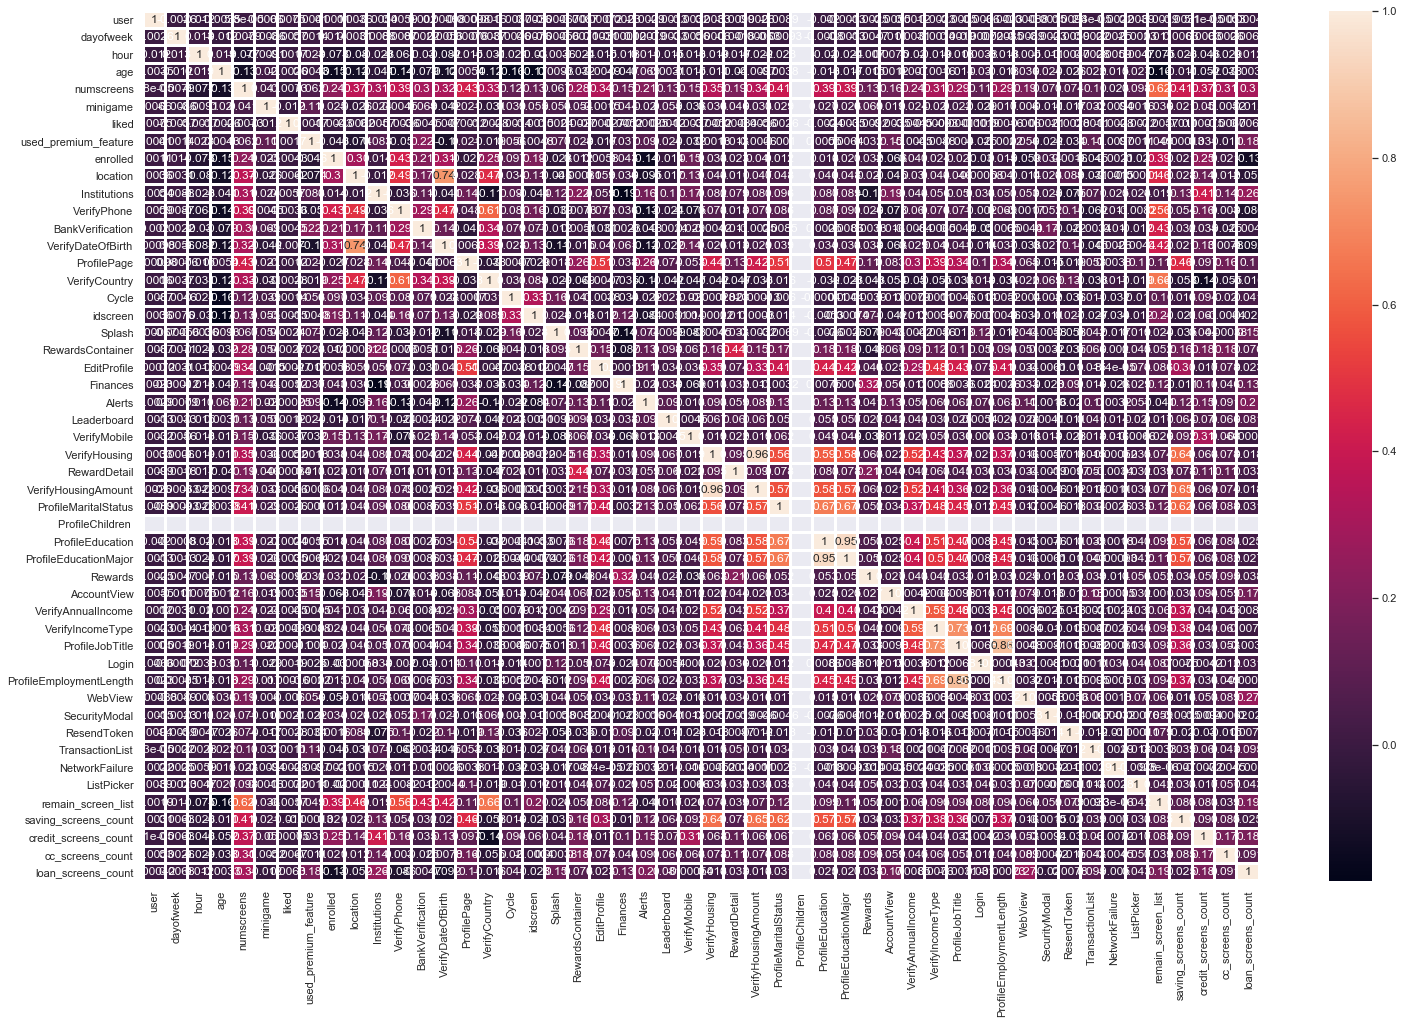

In [48]:
plt.figure(figsize = (25,16)) # size of matrix
sns.heatmap(dataset.corr(), annot = True, linewidth =2) # plotting matrix 
plt.savefig('Heatmap correlation matrix of Dataset')# save matrix as image

In [49]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.165000,0.172020,0.509000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.371184,0.377402,0.499924,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


## Data preprocessing and Feature scaling


#### splitting independent and response variables

In [50]:
response = dataset['enrolled']
dataset.drop(columns='enrolled',inplace=True)

#### splitting data into testing and training data


There is no validation data considered because it had a negligible impact on test model(even the same test error )

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [52]:
# we can not put user id in our model & also can not drop it as it is an identifier for each user, so let's keep it some where 
# as variable
train_id = X_train['user']
X_train.drop(columns='user',inplace=True)

test_id = X_test['user']
X_test.drop(columns='user',inplace=True)

C:\Users\ADITYA MANTRIPRAGADA\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=dataset.columns[1:])
X_test = pd.DataFrame(sc_X.transform(X_test),columns=dataset.columns[1:])

In [54]:
X_train.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.246319,2.186018,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.445173,-0.457453,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800


In [55]:
X_test.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,-1.489818,-1.553579,0.856728,0.819520,-0.34683,2.246319,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
1,0.972325,-0.881364,-0.528611,0.564865,-0.34683,-0.445173,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800


In [56]:
X_train.shape, X_test.shape

((40000, 48), (10000, 48))

---
### Logistic Regression Model
#### Model Training

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = {'C':[100,10,1,.1,.01,.001], 'penalty' : ['l1','l2']}
log_model = GridSearchCV(LogisticRegression(C=1),param_grid=param_grid)
log_model.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
#Balancing the Training Set
import random
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
   higher = pos_index
   lower = neg_index
else:
   higher = neg_index
   lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [59]:
log_model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [60]:
for params, score in zip(log_model.cv_results_['params'],log_model.cv_results_['mean_test_score']):
    print(params,score)

{'C': 100, 'penalty': 'l1'} 0.7621
{'C': 100, 'penalty': 'l2'} 0.7621
{'C': 10, 'penalty': 'l1'} 0.762075
{'C': 10, 'penalty': 'l2'} 0.762075
{'C': 1, 'penalty': 'l1'} 0.7619
{'C': 1, 'penalty': 'l2'} 0.762
{'C': 0.1, 'penalty': 'l1'} 0.7621
{'C': 0.1, 'penalty': 'l2'} 0.762125
{'C': 0.01, 'penalty': 'l1'} 0.761225
{'C': 0.01, 'penalty': 'l2'} 0.761775
{'C': 0.001, 'penalty': 'l1'} 0.7486
{'C': 0.001, 'penalty': 'l2'} 0.75925


***we will use 'L1' penalty as we might have correlated features like screens & 'L1' penalises any such fields that are strongly
correlated with response variable, this is because there will always be one screen that is just before the enrollment screen which imply that the correlation will be higher for that screen with enrollment screen ==> higher weight to that screen***

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=100, penalty='l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

----
#### Model Evaluation & Predictions

- Model Accuracy = sum of diagonal value of cm/sum of all values of cm(confusion matrix)
- We also look for Precision to insure that model accuracy is inceased not because of some overfitting issues
- Precision Score = True Positive / (True Positive + False Positive), meaning that out-of all predicted positives what percentage are Actual positives
- Recall Score = True Positives / (True Positives + False Negatives, meaning that out-of all Actual Positives What Percentage are predicted to be positives
- We will also calculate f1-score as it creates a balance between Precision & Recall coz it is weighted average of Precision & Recall thereby it considers both False Positives & Flase Negative Intuitively f1-score is not easy to understand as accuracy but it is much better metric in case of class imbalanced data as in our case
- F1-Score = Precision*Recall / (Precision+Recall)

In [62]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score 
cm = confusion_matrix(y_test,y_pred)
print('Classification Report: ','\n',classification_report(y_test,y_pred))

print('Model Accuracy :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score : ',recall_score(y_test,y_pred))
print('F1-Score : ',f1_score(y_test,y_pred))

Classification Report:  
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      4941
           1       0.77      0.77      0.77      5059

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Model Accuracy : 0.7642
Precision Score : 0.7668444971349536
Recall Score :  0.7671476576398498
F1-Score :  0.7669960474308302


**Sensitivity or TPR = TP/(TP+FN)**      

**Specificity = TN/(TN+FP),  (1-Specificity)=FPR**

In [63]:
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
Specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('% of comapanies correctely identified who withdrawal from rating: ',Sensitivity, 
      ',  % of comapanies correctely identified who not withdrawal from rating: ',Specificity)

% of comapanies correctely identified who withdrawal from rating:  0.7671476576398498 ,  % of comapanies correctely identified who not withdrawal from rating:  0.7611819469742968


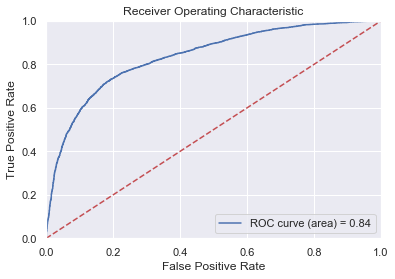

In [64]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_prob = classifier.predict_proba(X_test)
preds = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC curve (area) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Here Area under ROC curve covers 85% which implies that the 85% of time model distinguish the 2 classes correctly**

***Python based Confusion Matrix***

|       |       | Predicted     |                 |
| ----- |-------|---------------|-----------------|
|       |       | 0             | 1               |
|Actual | 0     |True Negatives | False Positives |
|       | 1     |False Negatives| True Positives  |


Text(0.5, 1, 'Confussion Matrix')

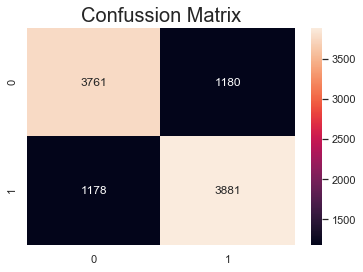

In [65]:
classfier = confusion_matrix(y_test, y_pred)
sns.heatmap(classfier, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

In [66]:
enrollmeant_Prob = classifier.predict_proba(X_test)
enrollmeant_Prob

array([[0.10429302, 0.89570698],
       [0.37087599, 0.62912401],
       [0.89779825, 0.10220175],
       ...,
       [0.91364341, 0.08635659],
       [0.39374515, 0.60625485],
       [0.42916667, 0.57083333]])

In [67]:
enrollmeant_Prob[:,1]

array([0.89570698, 0.62912401, 0.10220175, ..., 0.08635659, 0.60625485,
       0.57083333])

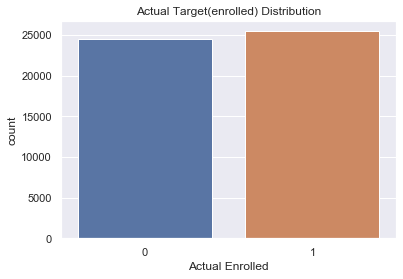

In [68]:
sns.countplot(response)
plt.title('Actual Target(enrolled) Distribution')
plt.xlabel('Actual Enrolled')
plt.show()

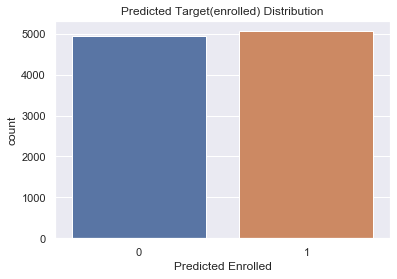

In [69]:
sns.countplot(pd.DataFrame(classifier.predict(X_test))[0])
plt.title('Predicted Target(enrolled) Distribution')
plt.xlabel('Predicted Enrolled')
plt.show()

`From both the plots we can conclude that both Actual & Predicted values follows same class distribution`

---
**Feature Importance**

In [70]:
weights = pd.Series(classifier.coef_[0],index=X_train.columns.values)
weights.sort_values(ascending = False)

remain_screen_list         0.959337
VerifyPhone                0.618478
credit_screens_count       0.564706
VerifyMobile               0.308088
idscreen                   0.164028
VerifyDateOfBirth          0.102475
VerifyAnnualIncome         0.075982
VerifyHousingAmount        0.059941
BankVerification           0.054883
Splash                     0.049942
VerifyHousing              0.042239
Rewards                    0.034048
EditProfile                0.032865
dayofweek                  0.032458
Cycle                      0.023654
cc_screens_count           0.022981
minigame                   0.016488
SecurityModal              0.015201
Finances                   0.011039
ProfileEducation           0.010850
NetworkFailure             0.009117
RewardDetail               0.007861
liked                      0.007396
ProfileJobTitle            0.005841
ProfileChildren            0.000000
saving_screens_count      -0.002036
RewardsContainer          -0.015794
Leaderboard               -0

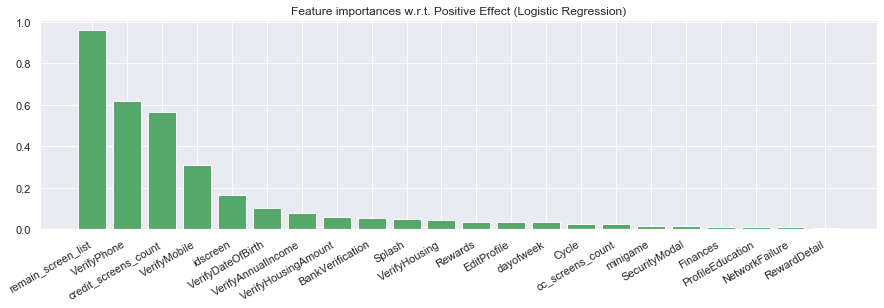

In [71]:
coefs = classifier.coef_[0]
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(15,5))
plt.title("Feature importances w.r.t. Positive Effect (Logistic Regression)")
plt.bar(range(22), coefs[indices[:22]],
       color="g", align="center")
plt.xticks(range(22), weights.sort_values(ascending = False).index, rotation=30, ha='right')
plt.subplots_adjust(bottom=0.3)

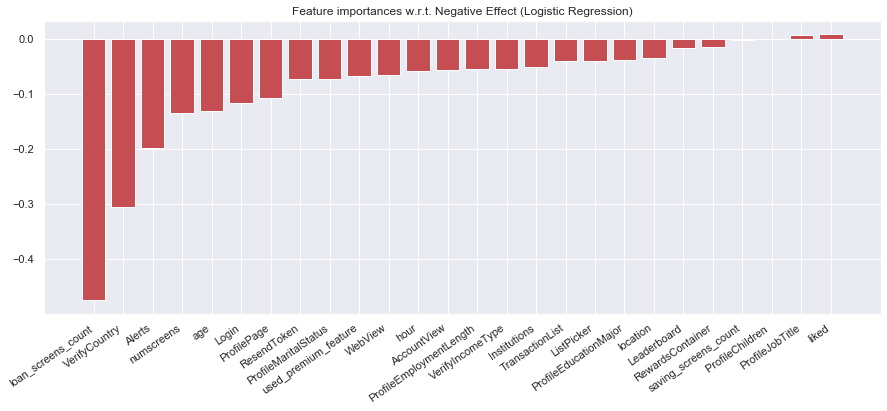

In [72]:
coefs = classifier.coef_[0]
indices = np.argsort(coefs)

plt.figure(figsize=(15,7))
plt.title("Feature importances w.r.t. Negative Effect (Logistic Regression)")
plt.bar(range(26), coefs[indices[:26]],
       color="r", align="center")
plt.xticks(range(26), weights.sort_values(ascending = True).index, rotation=35, ha='right')
plt.subplots_adjust(bottom=0.3)

---
## Conclusion & Final Results

- **Positively Affecting features to enrollment:** Other_sceens, VerifyPhone, CMCount, VerifyMobile, VerifyDateOfBirth, Rewards, EditProfile, etc, without any doubt all above features are situated to moving towards the enrollment screens.
- **Negatively Affecting features to enrollment:** LoanCount, VerifyCountry, Alerts, age, numscreens, Login, ResendToken, etc, if we see all these features are irritating & no user want to do this.

In [73]:
Final_Results = pd.concat([y_test,test_id],axis=1).dropna()

In [74]:
Final_Results['enrollment_Prob'] = enrollmeant_Prob[:,1]
Final_Results['Predicted Results'] = y_pred

***`Here below we can see users with highest probability in enrolling into the Premium features of App`***

In [75]:
Final_Results = Final_Results[['user','enrolled','Predicted Results','enrollment_Prob']].reset_index(drop=True)
Final_Results.sort_values(by ='enrollment_Prob',  ascending = False)

,user,enrolled,Predicted Results,enrollment_Prob
1849,319395,1,1,0.996343
6018,246990,0,1,0.995590
2822,131939,1,1,0.994470
9420,148005,1,1,0.994313
437,353394,1,1,0.991355
...,...,...,...,...
7066,127784,0,0,0.016960
4113,163067,1,0,0.016263
3899,30755,0,0,0.015905
9142,345238,0,0,0.013323


In [76]:
from IPython.display import display, HTML
display(HTML(Final_Results.to_html()))

,user,enrolled,Predicted Results,enrollment_Prob
0,239786,1,1,0.895707
1,279644,1,1,0.629124
2,98290,0,0,0.102202
3,170150,1,1,0.813052
4,237568,1,1,0.563619
5,65042,1,0,0.071589
6,207226,1,1,0.851687
7,363062,0,0,0.255046
8,152296,1,1,0.970310
9,64484,0,0,0.067541


In [77]:
Final_Results.describe()

,user,enrolled,Predicted Results,enrollment_Prob
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,186099.781600,0.50590,0.506100,0.507020
std,107425.139591,0.49999,0.499988,0.291730
min,23.000000,0.00000,0.000000,0.011301
25%,92847.750000,0.00000,0.000000,0.235353
50%,185770.500000,1.00000,1.000000,0.509270
75%,278927.000000,1.00000,1.000000,0.777266
max,373639.000000,1.00000,1.000000,0.996343


# Results

## The Predicted model has a accuracy of 84.67%